# Objective
I have crawled Netdoktor for my thesis at [HSLU](https://www.hslu.ch/en/lucerne-school-of-business/degree-programmes/master/applied-information-and-data-science/). The task at hand was to use Netdoktor as an additional source to the main data source to the one provided by [IML](https://www.iml.unibe.ch/). Unfortunatelly, I cannot share this confidential information, because the IML data consists of Multiple Choice Questions for medical students - and yes, I am talking about exam questions :P 

However, I am therefore forced to create a Word2Vec model using public available data. Therefore, a data set is obtained by web crawling of Netdoktor^[<https://www.netdoktor.ch/>]. Netdoktor is a free internet platform for medical information: It provides information about diseases and symptoms in German and other languages. The website is a part of the German media company Hubert Burda Media^[<https://www.burda.com/en/imprint/>] and was founded by  Dr. Carl Brandt and Rune Bech.


Let's start to code :) 

# Code
First, the necessary libraries are imported. We use Pandas, Matplotlib and Seaborn and use only the columns `disease`, `description` and `symptoms`.

## Import Libraries and Data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

from IPython.display import display, Markdown

df = (
    pd.read_pickle(
        '../data/corpus.pkl', 
        compression = {'method': 'gzip'},
    )
    # Select only columns 'disease', 'description', 'symptoms'
    [['disease','description','symptoms']]
)


df.head()

,disease,description,symptoms
0,arthrose,Als Arthrose bezeichnen Mediziner den Verschle...,Symptome Anfangs verursacht Gelenk-Verschleiss...
1,niedriger-blutdruck,Niedriger Blutdruck (arterielle Hypotonie) ist...,Niedriger Blutdruck: Symptome Nicht immer ruft...
2,alkoholvergiftung,Bei einer Alkoholvergiftung (Alkoholintoxikati...,Alkoholvergiftung: Symptome Es gibt fliessende...
4,plazentaabloesung,Die Plazenta (Mutterkuchen) ist ein Gewebe an ...,Wie erkennt man eine vorzeitige Plazentaablösu...
5,salmonellenvergiftung,Eine Salmonellenvergiftung (Salmonellose) ist ...,Welche Symptome treten bei einer Salmonellenve...


In [2]:
#| output: true
#| echo: false

display(Markdown(f'The data consists of {df.shape[0]} diseases and {df.shape[1]} columns.'))

The data consists of 639 diseases and 3 columns.

## Exploration
First we perform some basic text exploration that includes: for each column we calculate the text length and we calculate of the number of tokens. We use the `.str.split()` methods from Pandas without any fancy library in the first step.

In [3]:
df = (
    df
    .assign(
        len_description = lambda df: df.description.apply(len),
        len_symptoms = lambda df: df.symptoms.apply(len),
        tokens_description = lambda df: df.description.str.split(),
        tokens_symptoms = lambda df: df.symptoms.str.split(),
        n_tokens_description = lambda df: df.tokens_description.apply(len),
        n_tokens_symptom = lambda df: df.tokens_symptoms.apply(len),
    )
)

df_melted = (
    df
    .melt(
        id_vars='disease', 
        value_vars = ['len_description','len_symptoms','n_tokens_description','n_tokens_symptom']
    )
)

<Figure size 1170x827 with 0 Axes>

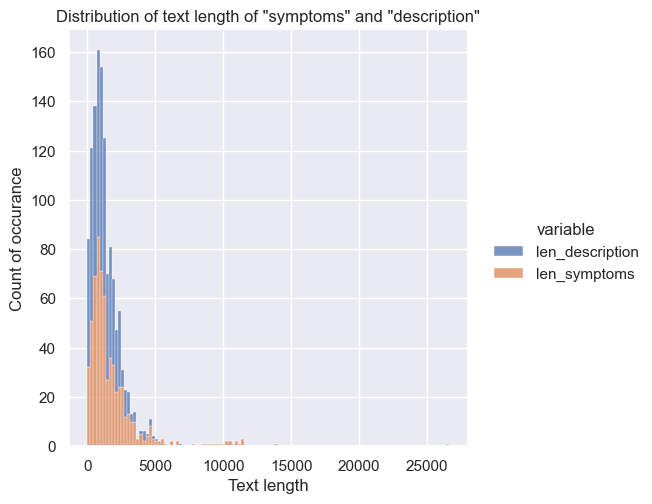

In [4]:
#| label: fig-text_length_description_and_symptoms
#| fig-cap: Distribution of text length of columns "description" and "symptoms"

plt.figure()
g = sns.displot(
    data = df_melted.query('variable != "n_tokens_description" & variable != "n_tokens_symptom"'),
    x = 'value',
    hue = 'variable',
    multiple = "stack",
)
plt.title('Distribution of text length of "symptoms" and "description"')
plt.xlabel('Text length')
plt.ylabel('Count of occurance')
plt.show(g)

The figure above shows the distribution of the text length and count of the columns "description" and "symptoms". Both distribution shows approximately the same distribution and range between `0` and about `5000` with a few outliers above `5000`. Next, the number of tokens is investigated for both columns.

<Figure size 1170x827 with 0 Axes>

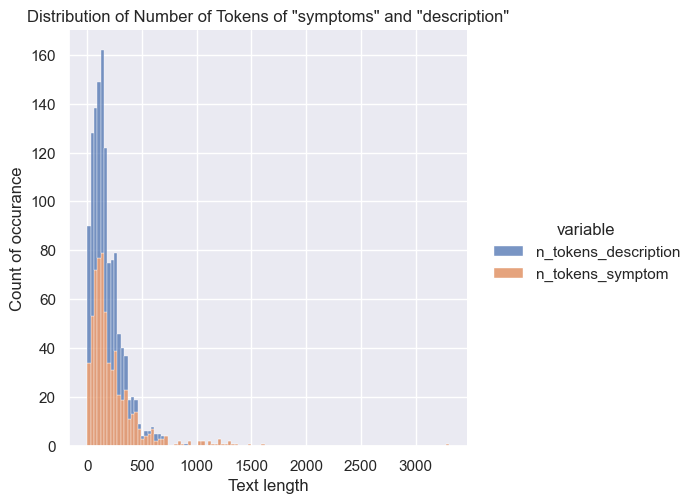

In [5]:
#| label: fig-text_number_of_tokens_description_and_symptoms
#| fig-cap: Distribution of number of tokens of columns "description" and "symptoms"

plt.figure()
g = sns.displot(
    data = df_melted.query('variable == "n_tokens_description" | variable == "n_tokens_symptom"'),
    x = 'value',
    hue = 'variable',
    multiple = "stack",
)
plt.title('Distribution of Number of Tokens of "symptoms" and "description"')
plt.xlabel('Text length')
plt.ylabel('Count of occurance')
plt.show(g)

The graph above shows the distribution of the number of tokens by columns `description` and `symptoms`. Again, we see a similar distribution between the values `0` and `750` and a peak around `250`.